<a href="https://colab.research.google.com/github/NuryaFahruRosyidin2406/Dicoding_Learn-ML/blob/main/Latihan_Deploy_Model_ML_Menggunakan_TensorFlow_js_memprediksi_dalam_lingkup_klasifikasi_gambar__bahan_makanan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Klasifikasi Gambar Bahan Makanan

## Menyiapkan Library

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import pathlib

## Preprocessing Data


1.   Melakukan image augmentation.
2.   Mempersiapkan data latih dan data evaluasi.
3.   Memberi label pada dataset secara otomatis.

In [33]:
TRAINING_DIR = "dataset_1/train"
VALIDATION_DIR = "dataset_1/test"

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    #horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

Found 550 images belonging to 6 classes.


### Melihat class nya untuk train

In [34]:
# Mendapatkan kelas-kelas dan indeksnya dari generator
class_labels_train = train_generator.class_indices

# Mencetak kelas-kelas dan indeksnya
print(class_labels_train)

{'.ipynb_checkpoints': 0, 'Broccoli': 1, 'Carrot': 2, 'Cheese': 3, 'Potato': 4, 'Tomato': 5}


### Menghindari .ipynb_checkpoints': 0 sebagai class untuk train

In [35]:
classes = ['Broccoli', 'Carrot', 'Cheese', 'Potato', 'Tomato']

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=32,
    class_mode='categorical',
    target_size=(150, 150),
    classes=classes
)

Found 550 images belonging to 5 classes.


### Melihat class nya untuk train

In [36]:
# Mendapatkan kelas-kelas dan indeksnya dari generator
class_labels_train = train_generator.class_indices

# Mencetak kelas-kelas dan indeksnya
print(class_labels_train)

{'Broccoli': 0, 'Carrot': 1, 'Cheese': 2, 'Potato': 3, 'Tomato': 4}


In [37]:
validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                            batch_size=16,
                                                            class_mode='categorical',
                                                            target_size=(150, 150))

Found 122 images belonging to 6 classes.


### Melihat class nya untuk validasi

In [38]:
# Mendapatkan kelas-kelas dan indeksnya dari generator
class_labels_validasi = validation_generator.class_indices

# Mencetak kelas-kelas dan indeksnya
print(class_labels_validasi)

{'.ipynb_checkpoints': 0, 'Broccoli': 1, 'Carrot': 2, 'Cheese': 3, 'Potato': 4, 'Tomato': 5}


### Menghindari .ipynb_checkpoints': 0 sebagai class untuk validasi

In [39]:
classes = ['Broccoli', 'Carrot', 'Cheese', 'Potato', 'Tomato']

validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                            batch_size=16,
                                                            class_mode='categorical',
                                                            target_size=(150, 150),
                                                            classes=classes)

Found 122 images belonging to 5 classes.


### Melihat class nya untuk validasi

In [40]:
# Mendapatkan kelas-kelas dan indeksnya dari generator
class_labels_validasi = validation_generator.class_indices

# Mencetak kelas-kelas dan indeksnya
print(class_labels_validasi)

{'Broccoli': 0, 'Carrot': 1, 'Cheese': 2, 'Potato': 3, 'Tomato': 4}


## Membuat Model

Selanjutnya, buat dan latihlah model menggunakan dataset yang telah kita siapkan sebelumnya. Teknik yang akan digunakan kali ini adalah transfer learning memanfaatkan model `MobileNetV2`.

In [41]:
pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,
                                input_tensor=Input(shape=(150, 150, 3)))

for layer in pre_trained_model.layers:
    layer.trainable = False

last_output = pre_trained_model.output

In [42]:
x = tf.keras.layers.Flatten(name="flatten")(last_output)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(pre_trained_model.input, x)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 75, 75, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 75, 75, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 75, 75, 32)           0         ['bn_Conv1[0][0]']      

In [43]:
int_lr = 1e-4
num_epochs = 30

optimizer = tf.optimizers.Adam(lr=int_lr)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Melatih Model

In [44]:
H = model.fit(train_generator,
              epochs=num_epochs,
              validation_data=validation_generator)

Epoch 1/30
18/18 [==============================] - 24s 1s/step - loss: 1.5299 - accuracy: 0.4109 - val_loss: 0.7506 - val_accuracy: 0.8115
Epoch 2/30
18/18 [==============================] - 21s 1s/step - loss: 0.6407 - accuracy: 0.7909 - val_loss: 0.5720 - val_accuracy: 0.8443
Epoch 3/30
18/18 [==============================] - 20s 1s/step - loss: 0.4655 - accuracy: 0.8400 - val_loss: 0.6391 - val_accuracy: 0.8279
Epoch 4/30
18/18 [==============================] - 22s 1s/step - loss: 0.4041 - accuracy: 0.8873 - val_loss: 0.4623 - val_accuracy: 0.9016
Epoch 5/30
18/18 [==============================] - 18s 999ms/step - loss: 0.2718 - accuracy: 0.9200 - val_loss: 0.3833 - val_accuracy: 0.9098
Epoch 6/30
18/18 [==============================] - 21s 1s/step - loss: 0.2397 - accuracy: 0.9309 - val_loss: 0.4856 - val_accuracy: 0.8770
Epoch 7/30
18/18 [==============================] - 18s 1s/step - loss: 0.1889 - accuracy: 0.9436 - val_loss: 0.6001 - val_accuracy: 0.8607
Epoch 8/30
18/18 

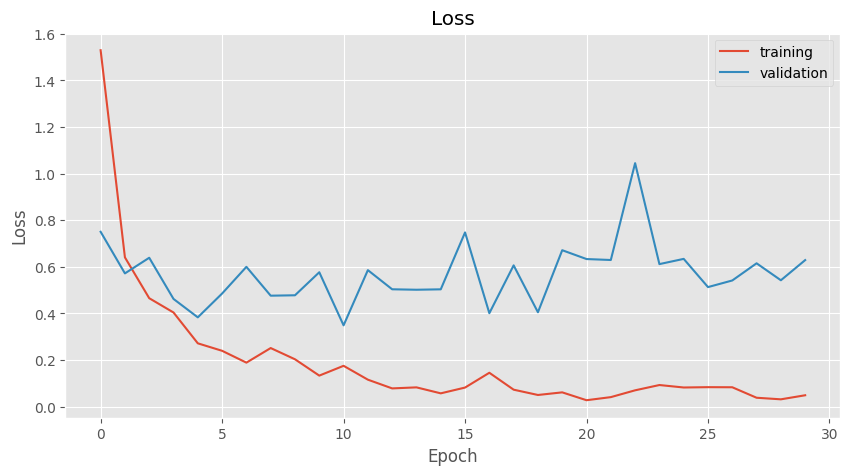

In [45]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

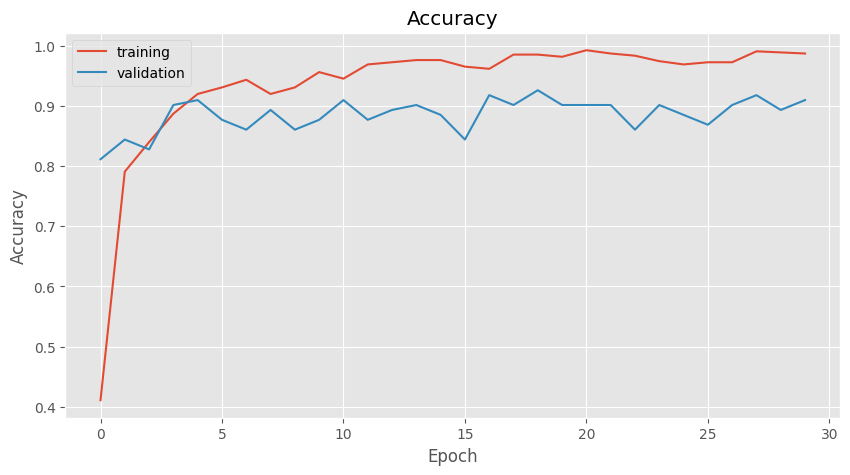

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

## Mengubah Model

### Menyimpan model dalam format SavedModel

In [47]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

### Convert SavedModel menjadi vegs.tflite

In [48]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [49]:
tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

13000052